# Exercise 1.1:
## a) 
Setup the stationary multi-armed bandit with k=4. Rewards from each bandit are either 1 or 0. 


In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bandits
bandits = {
    0: {'probability': 0.1},
    1: {'probability': 0.3},
    2: {'probability': 0.5},
    3: {'probability': 0.7}
}

# Print the probability of each bandit
for bandit in bandits:
    print(f"Probability of bandit {bandit}: {bandits[bandit]['probability']}")

# Find the best bandit
best_bandit = max(bandits, key=lambda x: bandits[x]['probability'])
print("Best bandit: ", best_bandit)

# Find the reward of the best bandit
best_bandit_reward = bandits[best_bandit]['probability']
print("Reward of best bandit: ", best_bandit_reward)

# Print the number of bandits
num_bandits = len(bandits)
print("Number of bandits: ", num_bandits)

# Print number of pulls
num_pulls = 2000
print("Number of pulls: ", num_pulls)

# Print number of runs
num_runs = 100
print("Number of runs: ", num_runs)


Probability of bandit 0: 0.1
Probability of bandit 1: 0.3
Probability of bandit 2: 0.5
Probability of bandit 3: 0.7
Best bandit:  3
Reward of best bandit:  0.7
Number of bandits:  4
Number of pulls:  2000
Number of runs:  100


We now want to implement the epsilon-greedy algorithm for the multi-armed bandit.

Here: [0. 0. 0. 0.], shape: (4,)


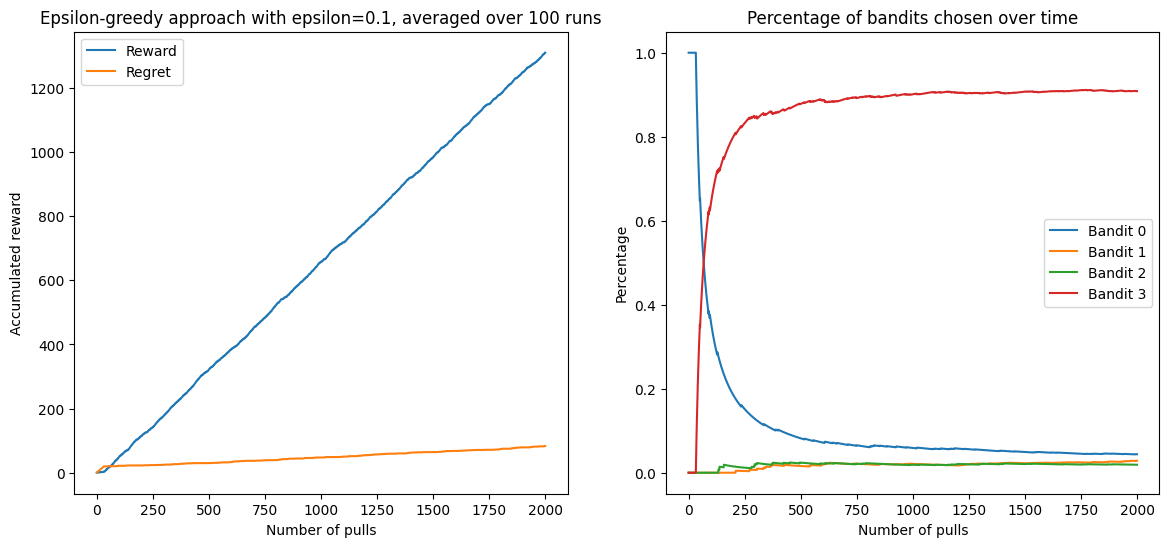

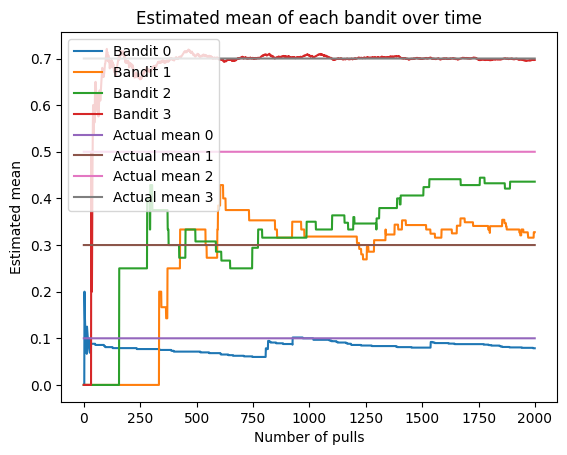

<Figure size 640x480 with 0 Axes>

In [192]:
# Epsilon-Greedy Algorithm with stationary bandits

import random

# Function to simulate pulling a bandit
def pull_bandit(bandit_number):
    bandit = bandits[bandit_number]
    if random.random() < bandit['probability']:
        return 1
    else:
        return 0


def run_epsilon_greedy(num_pulls=2000, epsilon=0.1, num_bandits=4, estimated_means=None):
    
    # Initialize reward
    total_reward = 0
    reward = np.zeros(num_pulls)

    # Initialize regret
    total_regret = 0
    regret = np.zeros(num_pulls)
    
    # Initialize estimated means 
    if estimated_means is None:
        estimated_means = np.zeros(num_bandits)
        estimated_means_over_time = np.zeros((num_bandits, num_pulls))
    else:
        estimated_means_over_time = np.zeros((num_bandits, num_pulls))
        estimated_means_over_time[:, 0] = estimated_means
    num_selections = np.ones(num_bandits)

    # Initialize actual means
    actual_means = [bandits[bandit]['probability'] for bandit in bandits]
    actual_means_over_time = np.zeros((num_bandits, num_pulls))

    # Initialize chosen bandits
    total_pulls = 0
    chosen_bandits = np.zeros(num_bandits)
    chosen_bandits_percentage = np.zeros((num_bandits, num_pulls))

    for i in range(num_pulls):
        total_pulls += 1
        actual_best_bandit = np.argmax(actual_means)

        if np.random.random() < epsilon:
            # Explore
            select_bandit = np.random.randint(num_bandits)
        else:
            # Exploit
            select_bandit = np.argmax(estimated_means) # select best bandit based on current estimated means

        # Compute reward 
        tmp_reward = pull_bandit(select_bandit)
        total_reward += tmp_reward
        reward[i] = total_reward

        # Compute regret
        tmp_regret = 0 if select_bandit == actual_best_bandit else actual_means[actual_best_bandit] - actual_means[select_bandit]
        total_regret += tmp_regret
        regret[i] = total_regret
        
        # Update the estimated means
        num_selections[select_bandit] += 1
        estimated_means[select_bandit] += 1/num_selections[select_bandit] * (tmp_reward - estimated_means[select_bandit])
        for bandit in range(num_bandits):
            estimated_means_over_time[bandit, i] = estimated_means[bandit]
            actual_means_over_time[bandit, i] = actual_means[bandit]

        # Add to chosen bandits
        chosen_bandits[select_bandit] += 1
        for bandit in bandits:
            chosen_bandits_percentage[bandit, i] = chosen_bandits[bandit] / total_pulls

    return reward, regret, epsilon, chosen_bandits_percentage, estimated_means_over_time, actual_means_over_time


reward, regret, epsilon, chosen_bandits_percentage, estimated_means_over_time, actual_means_over_time = run_epsilon_greedy()

"""# Run epsilon greedy 100 times and plot the averaged results
averaged_reward = np.zeros(num_pulls)
averaged_regret = np.zeros(num_pulls)
averaged_chosen_bandits_percentage = np.zeros((num_bandits, num_pulls))


for i in range(num_runs):
    reward, regret, epsilon, chosen_bandits_percentage, estimated_means_over_time, actual_means_over_time = run_epsilon_greedy()
    averaged_reward += reward
    averaged_regret += regret
    averaged_chosen_bandits_percentage += chosen_bandits_percentage
averaged_reward /= num_runs
averaged_regret /= num_runs
averaged_chosen_bandits_percentage /= num_runs
"""
# Plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot reward and regret in the first subplot
axs[0].plot(reward, label="Reward")
axs[0].plot(regret, label="Regret")
axs[0].set_xlabel("Number of pulls")
axs[0].set_ylabel("Accumulated reward")
axs[0].set_title(f"Epsilon-greedy approach with epsilon={epsilon}, averaged over {num_runs} runs")
axs[0].legend()

# Plot percentage of bandits chosen in the second subplot
axs[1].plot(chosen_bandits_percentage[0], label="Bandit 0")
axs[1].plot(chosen_bandits_percentage[1], label="Bandit 1")
axs[1].plot(chosen_bandits_percentage[2], label="Bandit 2")
axs[1].plot(chosen_bandits_percentage[3], label="Bandit 3")
axs[1].set_xlabel("Number of pulls")
axs[1].set_ylabel("Percentage")
axs[1].set_title("Percentage of bandits chosen over time")
axs[1].legend()

# Plot estimated means
plt.figure()
plt.plot(estimated_means_over_time[0], label="Bandit 0")
plt.plot(estimated_means_over_time[1], label="Bandit 1")
plt.plot(estimated_means_over_time[2], label="Bandit 2")
plt.plot(estimated_means_over_time[3], label="Bandit 3")
plt.plot(actual_means_over_time[0], label="Actual mean 0")
plt.plot(actual_means_over_time[1], label="Actual mean 1")
plt.plot(actual_means_over_time[2], label="Actual mean 2")
plt.plot(actual_means_over_time[3], label="Actual mean 3")
plt.xlabel("Number of pulls")
plt.ylabel("Estimated mean")
plt.title("Estimated mean of each bandit over time")
plt.legend()
plt.show()

plt.tight_layout()
plt.show()


Learnings: As we can see, the epsilon-greedy algorithm is able to find the best bandit over time. However, at first it is not able to find the best bandit, as it explores other bandits. After a certain number of pulls, it finds the best bandit and exploits it. 


## b) 
Plot different epsilon values, here 0.01, 0.1, 0.2 

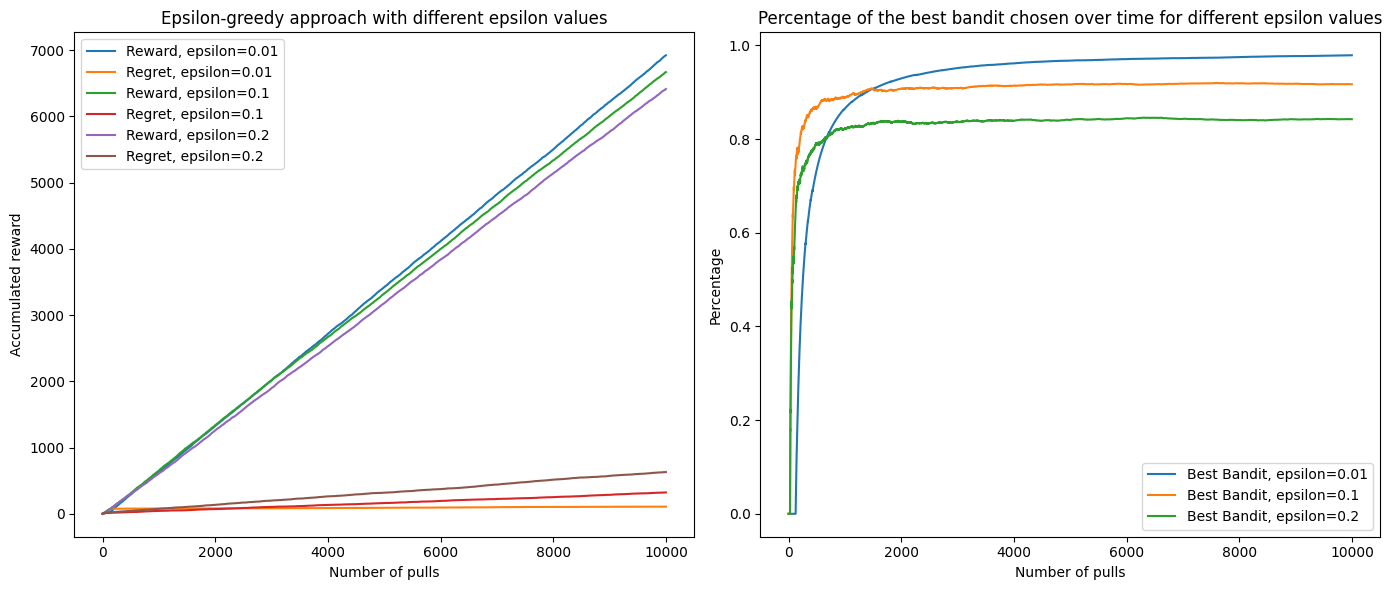

In [175]:
# Plot different epsilon values in one plot

epsilon_values = [0.01, 0.1, 0.2]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for epsilon in epsilon_values:
    reward, regret, _, chosen_bandits_percentage, _, _ = run_epsilon_greedy(num_pulls=10000, epsilon=epsilon)

    axs[0].plot(reward, label=f"Reward, epsilon={epsilon}")
    axs[0].plot(regret, label=f"Regret, epsilon={epsilon}")
    axs[0].set_xlabel("Number of pulls")
    axs[0].set_ylabel("Accumulated reward")
    axs[0].set_title("Epsilon-greedy approach with different epsilon values")
    axs[0].legend()

    axs[1].plot(chosen_bandits_percentage[best_bandit], label=f"Best Bandit, epsilon={epsilon}")
    axs[1].set_xlabel("Number of pulls")
    axs[1].set_ylabel("Percentage")
    axs[1].set_title("Percentage of the best bandit chosen over time for different epsilon values")
    axs[1].legend()

plt.tight_layout()
plt.show()



Learnings: As we can see, the higher the epsilon value, the more exploring happens in the beginning. In the long run, it can only exploit it with a probability of 1-epsilon. 

Over time, the lowest epsilon value is able to find the best bandit, but it takes much longer to do so. 

Therefore, choosing a low epsilon will only be advantageous in the long run. 

## c)
Initialize the estimated means once with a neutral approach (with 0) and once with an optimistic approach (with 0.7).

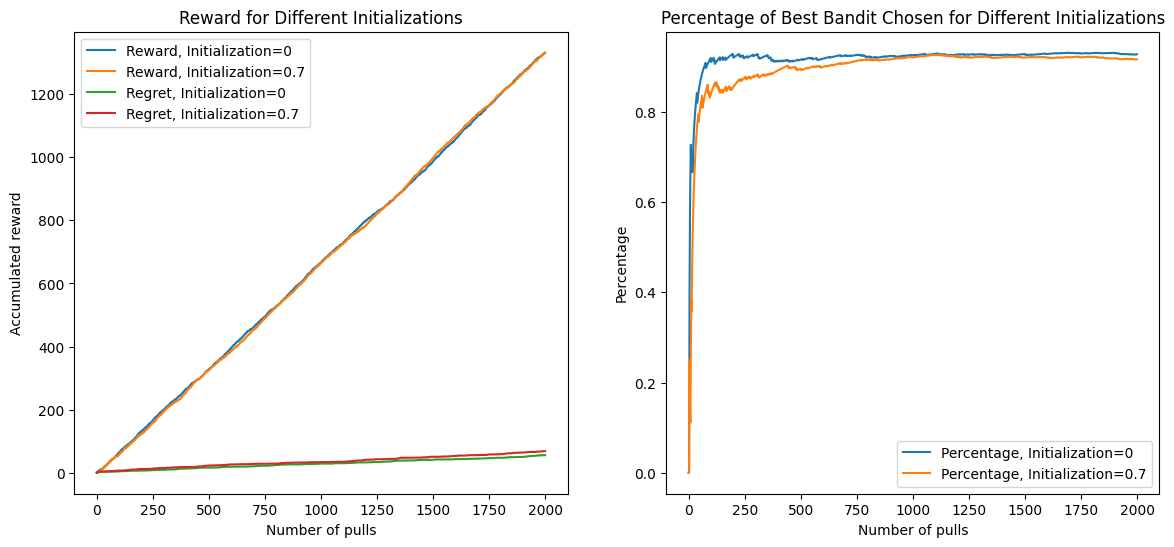

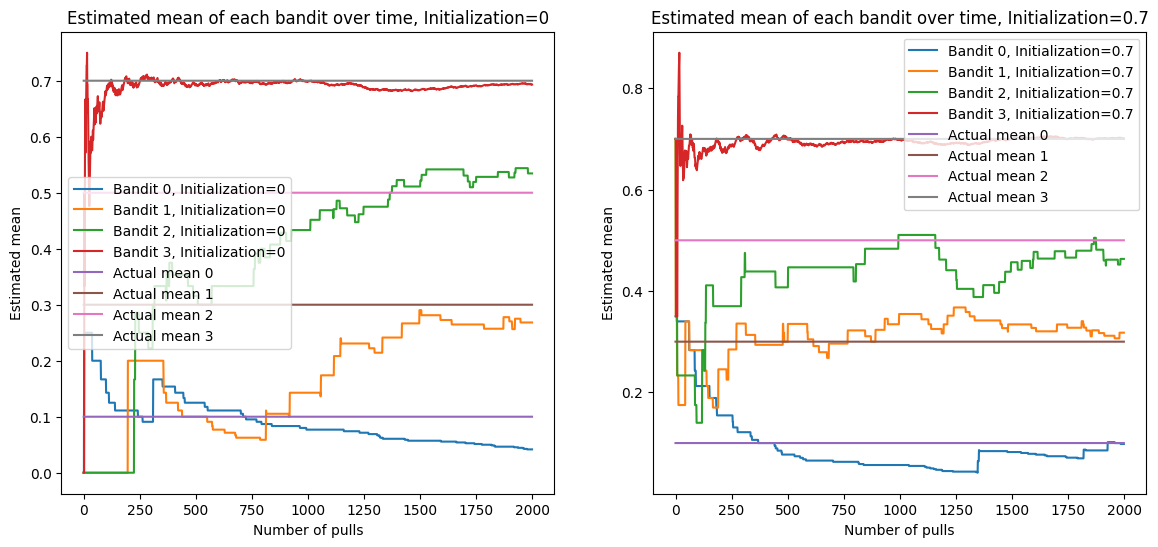

<Figure size 640x480 with 0 Axes>

In [198]:
# Initialize estimated means with 0
estimated_means_neutral = np.zeros((num_bandits))

# Initialize estimated means with 
start_value = 0.7  
estimated_means_optimistic = np.ones((num_bandits)) * start_value

# Run epsilon-greedy algorithm with both initializations
reward_neutral, regret_neutral, _, chosen_bandits_percentage_neutral, estimated_means_neutral, actual_means_neutral = run_epsilon_greedy(estimated_means=estimated_means_neutral)
reward_optimistic, regret_optimistic, _, chosen_bandits_percentage_optimistic, estimated_means_optimistic, actual_means_optimistic = run_epsilon_greedy(estimated_means=estimated_means_optimistic)


# Plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot reward and regret in the first subplot
axs[0].plot(reward_neutral, label="Reward, Initialization=0")
axs[0].plot(reward_optimistic, label=f"Reward, Initialization={start_value}")
axs[0].plot(regret_neutral, label="Regret, Initialization=0")
axs[0].plot(regret_optimistic, label=f"Regret, Initialization={start_value}")
axs[0].set_xlabel("Number of pulls")
axs[0].set_ylabel("Accumulated reward")
axs[0].set_title("Reward for Different Initializations")
axs[0].legend()

# Plot percentage of best bandit chosen in the second subplot
axs[1].plot(chosen_bandits_percentage_neutral[best_bandit], label=f"Percentage, Initialization=0")
axs[1].plot(chosen_bandits_percentage_optimistic[best_bandit], label=f"Percentage, Initialization={start_value}")
axs[1].set_xlabel("Number of pulls")
axs[1].set_ylabel("Percentage")
axs[1].set_title("Percentage of Best Bandit Chosen for Different Initializations")
axs[1].legend()

# Plot estimated means
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot estimated means for neutral initialization in the first subplot
axs[0].plot(estimated_means_neutral[0], label="Bandit 0, Initialization=0")
axs[0].plot(estimated_means_neutral[1], label="Bandit 1, Initialization=0")
axs[0].plot(estimated_means_neutral[2], label="Bandit 2, Initialization=0")
axs[0].plot(estimated_means_neutral[3], label="Bandit 3, Initialization=0")
axs[0].plot(actual_means_neutral[0], label="Actual mean 0")
axs[0].plot(actual_means_neutral[1], label="Actual mean 1")
axs[0].plot(actual_means_neutral[2], label="Actual mean 2")
axs[0].plot(actual_means_neutral[3], label="Actual mean 3")
axs[0].set_xlabel("Number of pulls")
axs[0].set_ylabel("Estimated mean")
axs[0].set_title("Estimated mean of each bandit over time, Initialization=0")
axs[0].legend()

# Plot estimated means for optimistic initialization in the second subplot
axs[1].plot(estimated_means_optimistic[0], label=f"Bandit 0, Initialization={start_value}")
axs[1].plot(estimated_means_optimistic[1], label=f"Bandit 1, Initialization={start_value}")
axs[1].plot(estimated_means_optimistic[2], label=f"Bandit 2, Initialization={start_value}")
axs[1].plot(estimated_means_optimistic[3], label=f"Bandit 3, Initialization={start_value}")
axs[1].plot(actual_means_optimistic[0], label="Actual mean 0")
axs[1].plot(actual_means_optimistic[1], label="Actual mean 1")
axs[1].plot(actual_means_optimistic[2], label="Actual mean 2")
axs[1].plot(actual_means_optimistic[3], label="Actual mean 3")
axs[1].set_xlabel("Number of pulls")
axs[1].set_ylabel("Estimated mean")
axs[1].set_title(f"Estimated mean of each bandit over time, Initialization={start_value}")
axs[1].legend()

plt.show()

plt.tight_layout()
plt.show()



Learnings: As we can see, the optimistic initialization is better, as it finds the best bandit much faster in most cases. In some cases though, the optimistic approach can backfire, as a worse bandit is chosen and exploited in the beginning, until the actual best bandit is chosen and exploited.

We tried to average the results but got a shape transformation error, which couldnt be resolved in a reasonable time. 

## d) 
Modiify the algorithm, such that epsilon gets smaller over time.

(2000,)
Here: [0. 0. 0. 0.], shape: (4,)


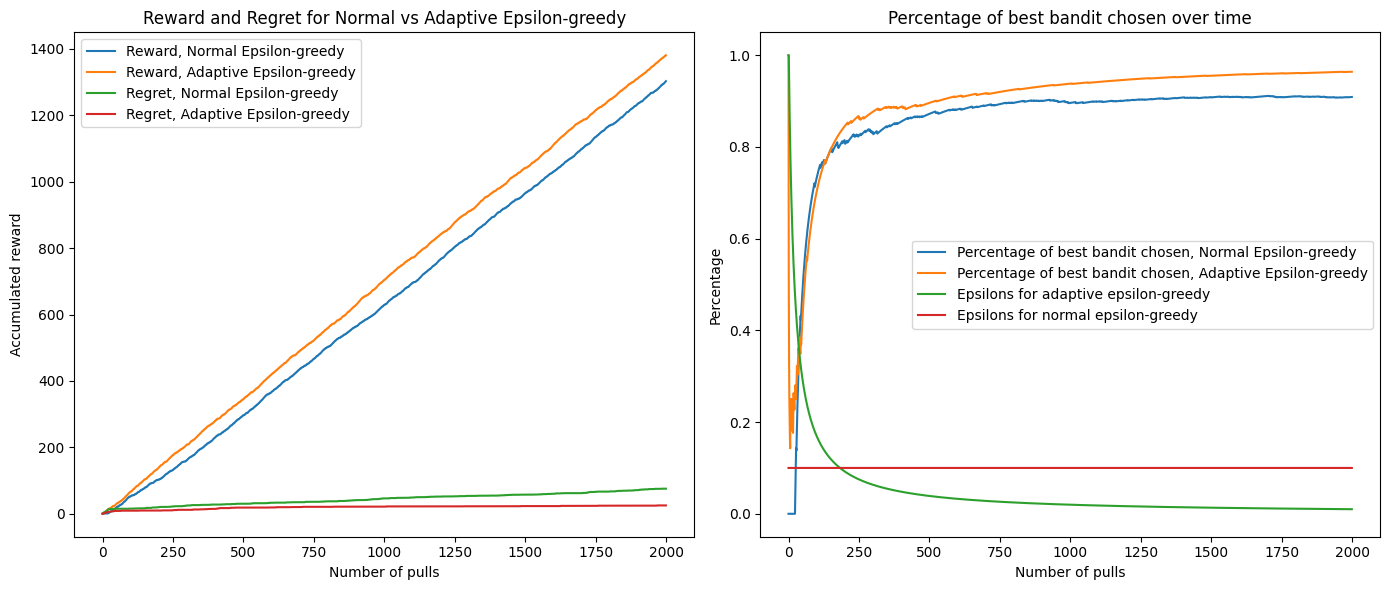

In [235]:
# Adaptive Epsilon-Greedy Algorithm

# Define the epsilons using 100 ones and then a 1/x function starting from 1 going to 0.01

epsilons = np.ones(1)
epsilons = np.concatenate([epsilons, 1/(np.linspace(1, 100, num_pulls-1))])

def run_adaptive_epsilon_greedy(num_pulls=2000, epsilons=epsilons, num_bandits=4, estimated_means=None):
    
    # Initialize reward
    total_reward = 0
    reward = np.zeros(num_pulls)

    # Initialize regret
    total_regret = 0
    regret = np.zeros(num_pulls)
    
    # Initialize estimated means 
    if estimated_means is None:
        estimated_means = np.zeros(num_bandits)
    estimated_means_over_time = np.zeros((num_bandits, num_pulls))
    num_selections = np.zeros(num_bandits)

    # Initialize actual means
    actual_means = [bandits[bandit]['probability'] for bandit in bandits]
    actual_means_over_time = np.zeros((num_bandits, num_pulls))

    # Initialize chosen bandits
    total_pulls = 0
    chosen_bandits = np.zeros(num_bandits)
    chosen_bandits_percentage = np.zeros((num_bandits, num_pulls))

    for i in range(num_pulls):
        total_pulls += 1
        actual_best_bandit = np.argmax(actual_means)

        if np.random.random() < epsilons[i]:
            # Explore
            select_bandit = np.random.randint(num_bandits)
        else:
            # Exploit
            select_bandit = np.argmax(estimated_means) # select best bandit based on current estimated means

        # Compute reward 
        tmp_reward = pull_bandit(select_bandit)
        total_reward += tmp_reward
        reward[i] = total_reward

        # Compute regret
        tmp_regret = 0 if select_bandit == actual_best_bandit else actual_means[actual_best_bandit] - actual_means[select_bandit]
        total_regret += tmp_regret
        regret[i] = total_regret
        
        # Update the estimated means
        num_selections[select_bandit] += 1
        estimated_means[select_bandit] += 1/num_selections[select_bandit] * (tmp_reward - estimated_means[select_bandit])
        for bandit in range(num_bandits):
            estimated_means_over_time[bandit, i] = estimated_means[bandit]
            actual_means_over_time[bandit, i] = actual_means[bandit]

        # Add to chosen bandits
        chosen_bandits[select_bandit] += 1
        for bandit in bandits:
            chosen_bandits_percentage[bandit, i] = chosen_bandits[bandit] / total_pulls

    return reward, regret, epsilons, chosen_bandits_percentage, estimated_means_over_time, actual_means_over_time
    
reward_normal, regret_normal, epsilons, chosen_bandits_percentage_normal, estimated_means_over_time_normal, actual_means_over_time_normal = run_epsilon_greedy()
reward_adaptive, regret_adaptive, epsilons, chosen_bandits_percentage_adaptive, estimated_means_over_time_adaptive, actual_means_over_time_adaptive = run_adaptive_epsilon_greedy()


# Plot results for normal epsilon-greedy vs adaptive epsilon-greedy
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot reward and regret in the first subplot
axs[0].plot(reward_normal, label="Reward, Normal Epsilon-greedy")
axs[0].plot(reward_adaptive, label="Reward, Adaptive Epsilon-greedy")
axs[0].plot(regret_normal, label="Regret, Normal Epsilon-greedy")
axs[0].plot(regret_adaptive, label="Regret, Adaptive Epsilon-greedy")
axs[0].set_xlabel("Number of pulls")
axs[0].set_ylabel("Accumulated reward")
axs[0].set_title(f"Reward and Regret for Normal vs Adaptive Epsilon-greedy")
axs[0].legend()

# Plot percentage of best bandit chosen and epsilon in the second subplot
axs[1].plot(chosen_bandits_percentage_normal[best_bandit], label="Percentage of best bandit chosen, Normal Epsilon-greedy")
axs[1].plot(chosen_bandits_percentage_adaptive[best_bandit], label="Percentage of best bandit chosen, Adaptive Epsilon-greedy")
axs[1].plot(epsilons, label="Epsilons for adaptive epsilon-greedy")
axs[1].plot(np.ones(num_pulls)*0.1, label="Epsilons for normal epsilon-greedy")
axs[1].set_xlabel("Number of pulls")
axs[1].set_ylabel("Percentage")
axs[1].set_title("Percentage of best bandit chosen over time")
axs[1].legend()

plt.tight_layout()
plt.show()


Learnings: If we model the epsilon values in a 1/x fashion, going from 1 down to 0.01, we get a high exploration rate in the beginning, which is necessary to first find the best bandit. After some time, we can be pretty sure we have chosen the right bandit and we can exploit it using smaller epsilon values. 